In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Загружаем акции

Берем акции из YahooFinance через download

In [30]:
stock = 'AAPL'
data = yf.download(stock, '2016-01-01', '2022-08-01')

#Условия по стратегиям
short_ma = 5
long_ma = 12
rsi_period = 14
rsi_oversold = 30
rsi_overbought = 70
sr_sell = 0.7
sr_buy = 0.3

# Считаем скользящие средние
data['MA'+str(short_ma)] = data['Close'].rolling(short_ma).mean()
data['MA'+str(long_ma)] = data['Close'].rolling(long_ma).mean()

#Для расчета RSI
data['return'] = data['Close'].pct_change()
data['Up'] = np.maximum(data['Close'].diff(),0)
data['Down'] = np.maximum(-data['Close'].diff(),0)
data['RS'] = data['Up'].rolling(rsi_period).mean()/data['Down'].rolling(rsi_period).mean()
data['RSI'] = 100-100/(1+data['RS'])

#Для расчета уровней по круглым числам
data['S&R'] = (data['Close']/10**np.floor(np.log10(data['Close'])))%1

#Выбираем день начала
start = max(long_ma, rsi_period)

#Логика сигналов по индикаторам
data['MACD_signal'] = 2*(data['MA'+str(short_ma)] > data['MA'+str(long_ma)])-1
data['RSI_signal'] = 1*(data['RSI'] < rsi_oversold) - 1*(data['RSI'] > rsi_overbought)
data['S&R_signal'] = 1*(data['S&R'] < sr_buy) - 1*(data['S&R'] > sr_sell)

#Расчет суммарной доходности
BnH_return = np.array(data['return'][start+1:])
MACD_return = np.array(data['return'][start+1:])*np.array(data['MACD_signal'][start:-1])
RSI_return = np.array(data['return'][start+1:])*np.array(data['RSI_signal'][start:-1])
SR_return = np.array(data['return'][start+1:])*np.array(data['S&R_signal'][start:-1])

#Средняя годовая доходность
BnH = np.prod(1+BnH_return)**(252/len(BnH_return))
MACD = np.prod(1+MACD_return)**(252/len(MACD_return))
RSI = np.prod(1+RSI_return)**(252/len(RSI_return))
SR = np.prod(1+SR_return)**(252/len(SR_return))

#Риск
BnH_risk = np.std(BnH_return)*(252)**(1/2)
MACD_risk = np.std(MACD_return)*(252)**(1/2)
RSI_risk = np.std(RSI_return)*(252)**(1/2)
SR_risk = np.std(SR_return)*(252)**(1/2)

#вывод информации
print('Доходность и риск стратегии buy-n-hold '+str(round(BnH*100,2))+'% и '+str(round(BnH_risk*100,2))+'%')
print('Доходность и риск стратегии MACD '+str(round(MACD*100,2))+'% и '+str(round(MACD_risk*100,2))+'%')
print('Доходность и риск стратегии RSI '+str(round(RSI*100,2))+'% и '+str(round(RSI_risk*100,2))+'%')
print('Доходность и риск стратегии поддержки и сопротивления '+str(round(SR*100,2))+'% и '+str(round(SR_risk*100,2))+'%')

[*********************100%***********************]  1 of 1 completed
Доходность и риск стратегии buy-n-hold 133.01% и 29.83%
Доходность и риск стратегии MACD 123.44% и 29.86%
Доходность и риск стратегии RSI 93.56% и 15.51%
Доходность и риск стратегии поддержки и сопротивления 110.94% и 22.28%


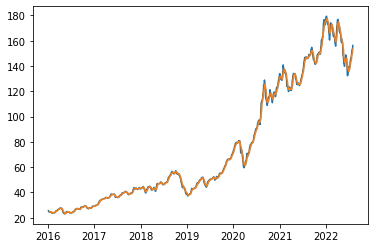

In [31]:
plt.plot(data['MA5'])
plt.plot(data['MA12'])

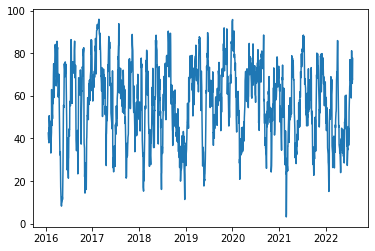

In [32]:
plt.plot(data['RSI'])

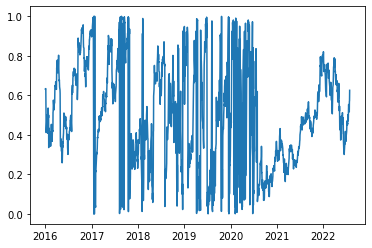

In [33]:
plt.plot(data['S&R'])

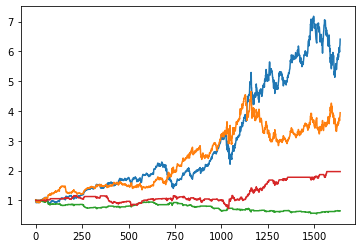

In [34]:
plt.plot(np.cumprod(1+BnH_return))
plt.plot(np.cumprod(1+MACD_return))
plt.plot(np.cumprod(1+RSI_return))
plt.plot(np.cumprod(1+SR_return))